# Deliverables:

- Submit the following files:

 1. Your **HTML document** that has your Source code and output
 2. Your **IPYNB script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

**Formatting Python Code**<br>
When programming in Python, refer to Kenneth Reitz’ PEP 8: The Style Guide for Python Code: http://pep8.org/ (Links to an external site.)Links to an external site.There is the Google style guide for Python at https://google.github.io/styleguide/pyguide.html.Comment often and in detail.


###   Data Preparation

As a data scientist for BestDeal retailer, you have been tasked with improving their revenue and the effectiveness of the marketing campaign of their electronic products. The given dataset has 10,000 records for the purchases of their customers and is used to predict customers shopping patterns and to provide answers for ad-hoc queries. The dataset DirtyData4BestDeal10000.csv is drawn from its database of customers.

In [57]:
import pandas as pd  # panda's alias is pd

import numpy as np  # numpy as np

from pandas import DataFrame, Series     # for convenience

import sqlalchemy

from sqlalchemy import create_engine

from sqlalchemy import inspect

import re      # regex for finding blank spaces

### Lets read the dirtydata4bestdeal CSV and load into a dataframe object

In [58]:
dirtydata4bestdeal=pd.read_csv('DirtyData4BestDeal10000.csv')

In [59]:
# Do you see NaN values below?

dirtydata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


In [60]:
dirtydata4bestdeal.shape

(10000, 34)

### Lets use boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

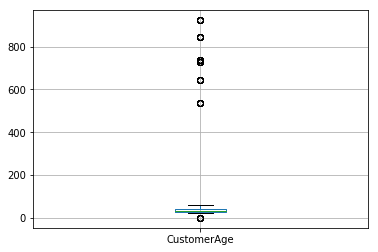

In [61]:
# https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Part%203%20-%20Plotting%20with%20Matplotlib.ipynb
%matplotlib inline
dirtydata4bestdeal.boxplot(column='CustomerAge')


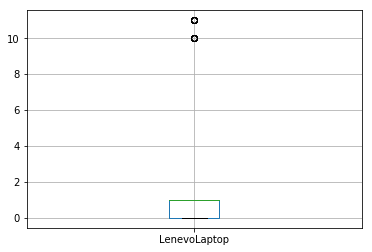

In [62]:
dirtydata4bestdeal.boxplot(column='LenevoLaptop')

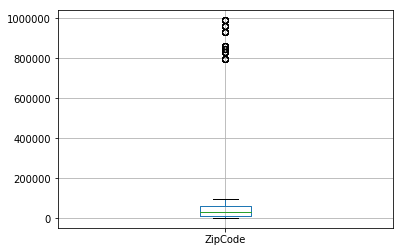

In [63]:
dirtydata4bestdeal.boxplot(column='ZipCode')


### Lets clean the dirty/messy data in the dirtydata4bestdeal dataframe object

In [ ]:
# Drop the NaN values 

cleandata4bestdeal=dirtydata4bestdeal.dropna()
cleandata4bestdeal.head()

# Do you see NaN values dropped below?


In [ ]:
# Let's see how many rows are left...
cleandata4bestdeal.shape

### Requirement: add the rest of your code here to finish cleaning the data


In [ ]:
# Add the rest of your code here to clean the data
# I ended up with 9140 records by deleting records with out of range customer ages 
# and out of range product flags (i.e. not 0 or 1).

#### Data cleaning task 1:  remove NaN values and deal with blank spaces in the dataset and convert all data types to integer

In [64]:
# replace Blank/Empty cells with NaN
cleandata4bestdeal = dirtydata4bestdeal.replace(' ', np.nan, regex = True)

# drop the NaN values
cleandata4bestdeal = cleandata4bestdeal.dropna() 

# drop blank space values 
cleandata4bestdeal.reset_index(drop = True)
cleandata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [65]:
cleandata4bestdeal.shape

(9430, 34)

In [66]:
cleandata4bestdeal.dtypes

ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop             object
BoseSoundSystem        object
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

In [67]:
# convert all data types to integers
cleandata4bestdeal = cleandata4bestdeal.astype(int) 

In [68]:
cleandata4bestdeal.dtypes

ZipCode               int64
CustomerAge           int64
SamsungTV46LED        int64
SonyTV42LED           int64
XBOX360               int64
DellLaptop            int64
BoseSoundSystem       int64
BoseHeadSet           int64
SonyHeadSet           int64
iPod                  int64
iPhone                int64
Panasonic50LED        int64
SonyPS4               int64
WiiU                  int64
WDexternalHD          int64
SamsungTV55LED        int64
SonyTV60LED           int64
SandiskMemoryCard     int64
SonySoundSystem       int64
SonyCamera            int64
PanasonicCamera       int64
HPPrinter             int64
SonyDVDplayer         int64
ToshibaDVDplayer      int64
GalaxyTablet          int64
SurfaceTablet         int64
HPLaptop              int64
HDMICable             int64
SpeakerCable          int64
CallOfDutyGame        int64
GrandTheftAutoGame    int64
ASUSLaptop            int64
LenevoLaptop          int64
TVStandWallMount      int64
dtype: object

#### Data cleaning task 2: remove products with invalid data (any integer value besides zero or one)

In [69]:
# keep rows that have product column values of either zero or one
cleandata4bestdeal.iloc[:,2:] = cleandata4bestdeal.iloc[:,2:][cleandata4bestdeal.iloc[:,2:].isin([0,1])] 

In [70]:
# drop the NaN values and check results
cleandata4bestdeal=cleandata4bestdeal.dropna() 
cleandata4bestdeal.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0.0,0.0,1.0,1,0.0,...,1.0,0.0,1,1,1.0,1,0.0,1,1.0,1.0
1,62791,43,0,1,0,0.0,1.0,0.0,1,0.0,...,1.0,0.0,1,0,1.0,1,0.0,1,1.0,1.0
3,60616,56,0,1,1,1.0,0.0,0.0,1,1.0,...,0.0,0.0,1,0,1.0,0,0.0,1,0.0,0.0
6,90033,44,1,1,1,1.0,0.0,0.0,0,0.0,...,1.0,1.0,1,1,0.0,1,1.0,0,0.0,1.0
9,2109,37,0,1,1,0.0,1.0,0.0,1,0.0,...,0.0,0.0,1,0,1.0,0,0.0,1,1.0,0.0


In [71]:
# check shape
cleandata4bestdeal.shape

(9204, 34)

#### Data cleaning task 3: remove rows where customer age is less than 18 or greater than 150

In [72]:
# explore how many ages are in the data and their quantity
custage = cleandata4bestdeal.groupby('CustomerAge')['CustomerAge'].count()
custage

CustomerAge
0        8
21     201
22     267
23     735
24     184
25     472
26     343
27     505
28     494
29     462
30      16
31     210
32     184
33     168
34     480
35     373
36     192
37     511
38     457
39     104
41      96
42     183
43     463
44     527
45     128
46     151
47     104
49     184
51      81
53      24
54     296
55      66
56     184
57     144
59     119
61      32
536      8
643      8
727      8
737     16
843      8
923      8
Name: CustomerAge, dtype: int64

In [73]:
# only keep rows where Customer Age falls into the allowable range of 18 to 150
cleandata4bestdeal = cleandata4bestdeal[cleandata4bestdeal.CustomerAge.between(18,150)]

In [74]:
cleandata4bestdeal.shape

(9140, 34)

In [75]:
# check results again to ensure ages outside the range 18-150 have been dropped
custage = cleandata4bestdeal.groupby('CustomerAge')['CustomerAge'].count()
custage

CustomerAge
21    201
22    267
23    735
24    184
25    472
26    343
27    505
28    494
29    462
30     16
31    210
32    184
33    168
34    480
35    373
36    192
37    511
38    457
39    104
41     96
42    183
43    463
44    527
45    128
46    151
47    104
49    184
51     81
53     24
54    296
55     66
56    184
57    144
59    119
61     32
Name: CustomerAge, dtype: int64

#### Check results

In [76]:
# Both of the following return True
cleandata4bestdeal.CustomerAge.between(18,150).all()

True

In [77]:
cleandata4bestdeal.drop(['ZipCode','CustomerAge'],axis=1).isin([0,1]).all().all()

True

### Lets store the cleaned data into the Database

In [78]:
engine=create_engine('sqlite:///bestdeal.db')

In [79]:
# cleandata4bestdeal.to_sql('trans4cust', engine)
# cleandata4bestdeal.to_sql('trans4cust', engine, chunksize=100) 
cleandata4bestdeal.to_sql('trans4cust', engine, if_exists='replace')

**Sanity Test: Did it create the table in bestdeal.db?  Check!!**

In [80]:
insp=inspect(engine)

In [81]:
 insp.get_table_names()

['trans4cust']

In [82]:
pd.read_sql_table('trans4cust', engine).columns

Index(['index', 'ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED',
       'XBOX360', 'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet',
       'SonyHeadSet', 'iPod', 'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU',
       'WDexternalHD', 'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard',
       'SonySoundSystem', 'SonyCamera', 'PanasonicCamera', 'HPPrinter',
       'SonyDVDplayer', 'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet',
       'HPLaptop', 'HDMICable', 'SpeakerCable', 'CallOfDutyGame',
       'GrandTheftAutoGame', 'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Now we are ready to query the Database

#### Query example #1: get the transactions for the customers in zipCode 60616

In [83]:
resultsForBestDealCustTrans=\
pd.read_sql_query("SELECT * FROM trans4cust WHERE ZipCode='60616'", engine)

In [84]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,3,60616,56,0,1,1,1.0,0.0,0.0,1,...,0.0,0.0,1,0,1.0,0,0.0,1,0.0,0.0
1,16,60616,43,0,1,1,0.0,1.0,0.0,1,...,1.0,0.0,1,1,1.0,1,0.0,1,1.0,1.0
2,18,60616,54,1,0,0,1.0,0.0,1.0,1,...,0.0,1.0,1,0,1.0,1,0.0,1,1.0,1.0
3,23,60616,43,1,1,1,0.0,1.0,1.0,1,...,1.0,1.0,1,1,0.0,1,0.0,1,1.0,1.0
4,34,60616,31,0,1,1,1.0,0.0,0.0,1,...,1.0,0.0,1,1,1.0,1,1.0,0,0.0,1.0


#### Query example #2: get the transactions for ALL customers

In [85]:
resultsForBestDealCustTrans=\
pd.read_sql_query("SELECT * FROM trans4cust", engine)

In [86]:
resultsForBestDealCustTrans.head()

,index,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,0,30134,35,1,1,1,0.0,0.0,1.0,1,...,1.0,0.0,1,1,1.0,1,0.0,1,1.0,1.0
1,1,62791,43,0,1,0,0.0,1.0,0.0,1,...,1.0,0.0,1,0,1.0,1,0.0,1,1.0,1.0
2,3,60616,56,0,1,1,1.0,0.0,0.0,1,...,0.0,0.0,1,0,1.0,0,0.0,1,0.0,0.0
3,6,90033,44,1,1,1,1.0,0.0,0.0,0,...,1.0,1.0,1,1,0.0,1,1.0,0,0.0,1.0
4,9,2109,37,0,1,1,0.0,1.0,0.0,1,...,0.0,0.0,1,0,1.0,0,0.0,1,1.0,0.0


#### Query example #3: get the number of customers in every ZipCode sorted by ZipCode

In [87]:
resultsForBestDealCustTrans=\
pd.read_sql_query('''
SELECT printf("%g",ZipCode) ZipCode , COUNT(*) as 'num_customers'
FROM trans4cust GROUP BY ZipCode
ORDER BY ZipCode
''', engine)

In [88]:
resultsForBestDealCustTrans

,ZipCode,num_customers
0,10065,750
1,2108,613
2,2109,917
3,2110,224
4,30134,1133
5,30303,985
6,33129,531
7,33130,280
8,44114,510
9,60532,243


#### Query example #4: get the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [89]:
resultsForBestDealCustTrans=\
pd.read_sql_query('''
SELECT CustomerAge , COUNT(*) as 'num_customers'
FROM trans4cust 
WHERE ZipCode=60616
GROUP BY CustomerAge
ORDER BY CustomerAge
''', engine)

In [90]:
resultsForBestDealCustTrans

,CustomerAge,num_customers
0,21,56
1,22,32
2,23,40
3,25,88
4,26,48
5,27,32
6,28,32
7,29,56
8,31,16
9,32,16


#### Query example #5: Plot in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products (either bought one of these products or the two products)

In [91]:
SonyTV60LEDCustTrans=pd.read_sql_query(
'''
SELECT ZipCode , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE SonyTV60LED=1
GROUP BY ZipCode
HAVING COUNT(*) > 400
''', engine)

BoseSoundSystemCustTrans=pd.read_sql_query(
'''
SELECT ZipCode , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE BoseSoundSystem=1
GROUP BY ZipCode
HAVING COUNT(*) > 400
''', engine)

In [92]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,2108,402
1,2109,578
2,10065,439
3,30134,757
4,30303,517
5,60616,689


In [93]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,2109,424
1,30134,799
2,30303,464
3,60616,466
4,90033,404


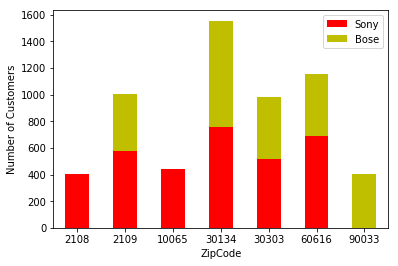

In [94]:
# Create the stacked bar plot...
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

df =pd.merge(SonyTV60LEDCustTrans, BoseSoundSystemCustTrans, 
         on='ZipCode',how='outer').fillna(0)
df.columns = ['ZipCode', 'Sony', 'Bose']
df.set_index('ZipCode').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y'])
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Original more lengthy approach to creating the stacked bar graph.
import numpy

#   There are zipcodes that Sony got bought but not Bose 
#   but there are also zipcodes that Bose got bought but not Sony
#
#   AND we need to use stacked-bar graph and we have a potentially asymmetrical set  of zipcode values
#   So, we need to do somework to create the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples=tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples=tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples=tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples=tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))




sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0

        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0


        
bose_zip= sorted(bose_dict.keys())

sony_zip= sorted(sony_dict.keys())

bose_zip_tuple=tuple(bose_zip)

sony_zip_tuple=tuple(sony_zip)

bose_customer_list=[]

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list=[]

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple=tuple(bose_customer_list)
sony_customer_tuple=tuple(sony_customer_list)


In [ ]:
# See docs for bar_stack at the URL
# http://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


ind = np.arange(len(sony_customer_tuple))    


# the width of the bars: can also be len(x) sequence
width = .5


p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)


plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 1610, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

# Requirements :
**Note**: Part of the requirements is to finish cleaning the data before writing the DataFrame to the database.
1. (Use SQL/SQlite): Get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge.
2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single csutomer in that zip code bought XBOX360)
3. (Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy  WDexternalHD for  every CustomerAge group that has more than 100 customers who bought these two products (either bought one of these products or the two products but didn't buy WDexternalHD)
4. (Use SQL/SQlite): Show the top 3 zip codes with the most customers
5. (Use SQL/SQlite): Selecting the customers from the top 3 zip codes (results from question 4), what are ages of the customers? Sort output by most customers. You can show all 3 zip codes combined or show ages by zip codes.


In [ ]:
# Write your python code that meets the above requirements in this cell

#### 1. (Use SQL/SQlite): Get the number of customers who bought DellLaptop and HPPrinter for every Age group sorted by CustomerAge.

In [95]:
# query
req1=\
pd.read_sql_query('''
SELECT CustomerAge , COUNT(*) as 'num_customers'
FROM trans4cust 
WHERE DellLaptop = 1 and HPPrinter = 1
GROUP BY CustomerAge
ORDER BY CustomerAge
''', engine)

In [96]:
# output
req1

,CustomerAge,num_customers
0,21,201
1,22,203
2,23,304
3,25,64
4,26,183
5,27,272
6,28,56
7,29,143
8,31,202
9,32,184


#### 2. (Use SQL/SQlite): Get the list of ZipCodes where no customer bought XBOX360 (this query means NOT even a single customer in that zip code bought XBOX360)

In [97]:
# query
req2=\
pd.read_sql_query('''
SELECT ZipCode
FROM (SELECT ZipCode, sum(XBOX360) as XBOXpurchases \
        FROM trans4cust
        GROUP BY ZipCode)
WHERE XBOXpurchases = 0
''', engine)

In [98]:
# output
req2

,ZipCode
0,62791


#### Use SQL/SQlite/Matplotlib): Plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge group that has more than 100 customers who bought these two products (either bought one of these products or the two products but didn't buy WDexternalHD)

In [99]:
# queries and dataframes for the two products

HPLaptopCustTrans=pd.read_sql_query(
'''
SELECT CustomerAge , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE HPLaptop=1 AND WDexternalHD = 0
GROUP BY CustomerAge
HAVING COUNT(*) > 100
''', engine)

HPPrinterCustTrans=pd.read_sql_query(
'''
SELECT CustomerAge , COUNT(*) as 'num_customers' 
FROM trans4cust 
WHERE HPPrinter=1 AND WDexternalHD = 0 
GROUP BY CustomerAge
HAVING COUNT(*) > 100
''', engine)

In [100]:
HPLaptopCustTrans

,CustomerAge,num_customers
0,21,192
1,22,203
2,23,437
3,25,147
4,26,205
5,27,307
6,28,128
7,29,290
8,31,204
9,32,176


In [101]:
HPPrinterCustTrans

,CustomerAge,num_customers
0,21,192
1,22,193
2,23,437
3,25,147
4,26,205
5,27,288
6,28,128
7,29,290
8,31,204
9,32,176


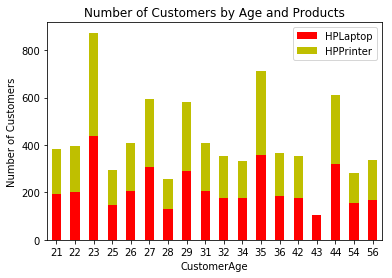

In [102]:
# Create the stacked bar plot

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

df =pd.merge(HPLaptopCustTrans, HPPrinterCustTrans, 
         on='CustomerAge',how='outer').fillna(0)
df.columns = ['CustomerAge', 'HPLaptop', 'HPPrinter']
df.set_index('CustomerAge').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y'])
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age and Products')
plt.show()

#### 4. (Use SQL/SQlite): Show the top 3 zip codes with the most customers

In [103]:
req3=\
pd.read_sql_query('''
SELECT printf("%g",ZipCode) ZipCode , COUNT(*) as 'num_customers'
FROM trans4cust GROUP BY ZipCode
ORDER BY num_customers DESC LIMIT 3
''', engine)

In [104]:
# output
req3

,ZipCode,num_customers
0,30134,1133
1,30303,985
2,60616,951


#### 5. (Use SQL/SQlite): Selecting the customers from the top 3 zip codes (results from question 4), what are ages of the customers? Sort output by most customers. You can show all 3 zip codes combined or show ages by zip codes.

In [105]:
CustomerAges=pd.read_sql_query(
'''
SELECT ZipCode, CustomerAge, COUNT(*) as 'num_customers'
FROM trans4cust 
WHERE ZipCode = '30134' OR ZipCode = '30303' OR ZipCode = '60616'
GROUP BY ZipCode, CustomerAge
ORDER BY num_customers DESC
''', engine)

In [106]:
# I constructed this output to match the sample output 5b from the output announcement
CustomerAges[0:16]

,ZipCode,CustomerAge,num_customers
0,30134,25,154
1,60616,34,96
2,60616,25,88
3,60616,44,87
4,30134,29,84
5,30303,26,83
6,30303,27,81
7,30303,44,77
8,30134,43,75
9,30134,34,74
